In [1]:
import torch
import torch.nn as nn
from plotnine import ggplot, aes, geom_point, facet_wrap, labs, theme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/var/folders/09/pw312rl50_l7j8rw0zf40hg80000gn/T/ipykernel_3247/1965508078.py:15: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:4419.)
/Users/viktor/PycharmProjects/gradient descent/Gradient-descent/.venv/lib/python3.11/site-packages/plotnine/themes/themeable.py:2486: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


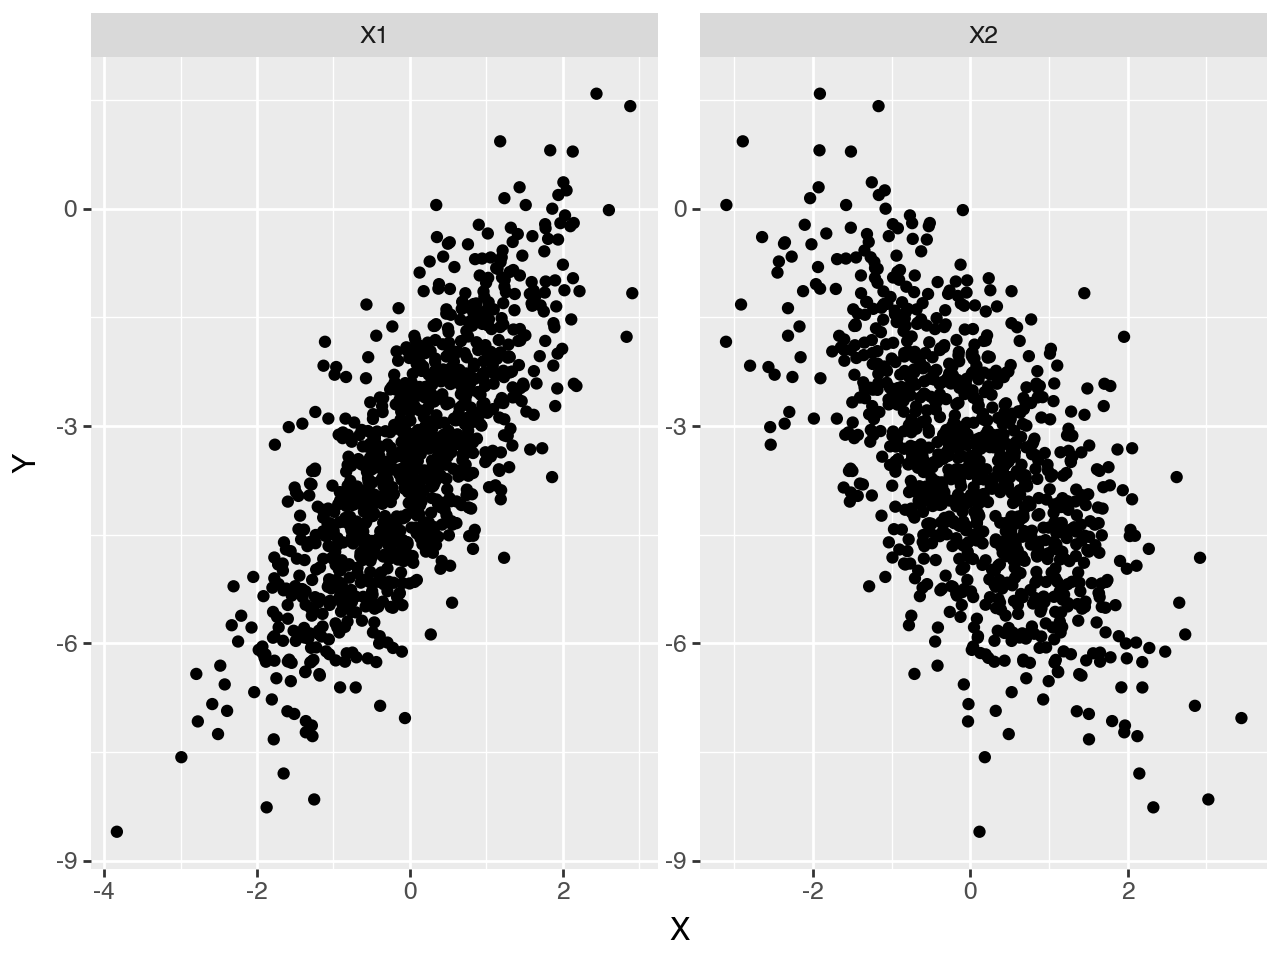

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Set number of samples
num_samples = 1000

# Create random features with 2 dimensions
x = torch.randn(num_samples, 2)

# Create random weights and bias for the linear regression model
true_weights = torch.tensor([1.3, -1.0])
true_bias = torch.tensor([-3.5])

# Target variable
y = x @ true_weights.T + true_bias

# Create a DataFrame from the features and target variable
data = pd.DataFrame({
    'Y': y.numpy(),  # Convert to NumPy array
    'X1': x[:, 0].numpy(),  # Convert to NumPy array
    'X2': x[:, 1].numpy()   # Convert to NumPy array
})

# Melt the DataFrame for plotting
data_melted = data.melt(id_vars='Y', value_vars=['X1', 'X2'],
                         var_name='Variable', value_name='Value')

# Create the scatter plot using Plotnine
plot = (ggplot(data_melted, aes(x='Value', y='Y')) +
        geom_point() +
        facet_wrap('~ Variable', scales='free', ncol=2) +
        labs(x='X', y='Y') +
        theme(subplots_adjust={'hspace': 0.5})
       )

# Display the plot
plot


In [3]:
# Define the model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out


# Define the input and output dimensions
input_size = x.shape[1]
output_size = 1

# Instantiate the model
model = LinearRegression(input_size, output_size)

In [4]:
# create a random weight & bias tensor
weight = torch.randn(1, input_size)
bias   = torch.rand(1)

# create a nn.Parameter object from the weight & bias tensor
weight_param = nn.Parameter(weight)
bias_param   = nn.Parameter(bias)

# assign the weight & bias parameter to the linear layer
model.linear.weight = weight_param
model.linear.bias   = bias_param

weight, bias = model.parameters()
print('Weight :',weight)
print('bias :',bias)

Weight : Parameter containing:
tensor([[-0.3239,  0.5574]], requires_grad=True)
bias : Parameter containing:
tensor([0.5710], requires_grad=True)


In [5]:
y_p = model(x)
y_p[:5]

tensor([[ 0.7760],
        [-0.8944],
        [-0.3369],
        [-0.3095],
        [ 1.7338]], grad_fn=<SliceBackward0>)

In [6]:
# Define the loss function
def Mean_Squared_Error(prediction, actual):
    error = (actual-prediction)**2
    return error.mean()


# Find the total mean squared error
loss = Mean_Squared_Error(y_p, y)
loss

tensor(19.9126, grad_fn=<MeanBackward0>)

Epoch [100/1000], weight:[[-0.2618025   0.44433367]], bias:[-0.1772297] Loss: 14.1803
Epoch [200/1000], weight:[[-0.21144073  0.35393423]], bias:[-0.7892359] Loss: 10.3030
Epoch [300/1000], weight:[[-0.17063741  0.28172654]], bias:[-1.289799] Loss: 7.7120
Epoch [400/1000], weight:[[-0.13759877  0.22408143]], bias:[-1.6992182] Loss: 5.9806
Epoch [500/1000], weight:[[-0.11086447  0.17808877]], bias:[-2.0340946] Loss: 4.8235
Epoch [600/1000], weight:[[-0.08924607  0.14141549]], bias:[-2.3080037] Loss: 4.0502
Epoch [700/1000], weight:[[-0.07177676  0.11219224]], bias:[-2.532051] Loss: 3.5333
Epoch [800/1000], weight:[[-0.05767057  0.08892149]], bias:[-2.7153137] Loss: 3.1878
Epoch [900/1000], weight:[[-0.04628874  0.07040431]], bias:[-2.865221] Loss: 2.9569
Epoch [1000/1000], weight:[[-0.03711247  0.05568102]], bias:[-2.987843] Loss: 2.8026


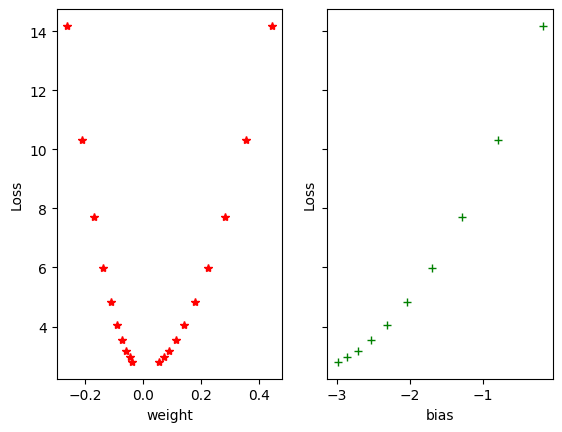

In [7]:
# Number of epochs
num_epochs = 1000

# Learning Rate
learning_rate = 0.01

# SUBPLOT WEIGHT & BIAS VS lOSSES
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for epoch in range(num_epochs):
    # Forward pass
    y_p = model(x)
    loss = Mean_Squared_Error(y_p, y)
    
    # Backproogation 
    # Find the fradient using 
    loss.backward()

    # Learning Rate
    learning_rate = 0.001

    # Model Parameter
    w = model.linear.weight
    b = model.linear.bias

    # Matually Update the model parameter
    w = w - learning_rate * w.grad
    b = b - learning_rate * b.grad

    # assign the weight & bias parameter to the linear layer
    model.linear.weight = nn.Parameter(w)
    model.linear.bias   = nn.Parameter(b)
            
    if (epoch+1) % 100 == 0:
        ax1.plot(w.detach().numpy(),loss.item(),'r*-')
        ax2.plot(b.detach().numpy(),loss.item(),'g+-')
        print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
            epoch+1,num_epochs,
            w.detach().numpy(),
            b.detach().numpy(),
            loss.item()))
        
ax1.set_xlabel('weight')
ax2.set_xlabel('bias')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Loss')
plt.show()

In [8]:
w = model.linear.weight
b = model.linear.bias

print('weight(W) = {} \n  bias(b) = {}'.format(
  w.abs(), 
  b.abs()))

weight(W) = tensor([[0.0371, 0.0557]], grad_fn=<AbsBackward0>) 
  bias(b) = tensor([2.9878], grad_fn=<AbsBackward0>)


In [9]:
pred =  x @ w.T + b
pred[:5]

tensor([[-2.9765],
        [-3.1385],
        [-3.0818],
        [-3.0756],
        [-2.8681]], grad_fn=<SliceBackward0>)